<a href="https://colab.research.google.com/github/ec1348/MLlearning/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#回歸練習 RMSE MSE R2_Score知識


CRIM：人均犯罪率

ZN：25,000平方英尺以上民用土地的比例

INDUS：城镇非零售业商用土地比例

CHAS：是否邻近查尔斯河，1是邻近，0是不邻近

NOX：一氧化氮浓度（千万分之一）

RM：住宅的平均房间数

AGE：自住且建于1940年前的房屋比例

DIS：到5个波士顿就业中心的加权距离

RAD：到高速公路的便捷度指数

TAX：每万元的房产税率

PTRATIO：城镇学生教师比例

B： 1000(Bk − 0.63)2 其中Bk是城镇中黑人比例

LSTAT：低收入人群比例

ans：自住房中位数价格，单位是千

In [79]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
# boston
# DataFram 是表個 Series 是一行一行
df = pd.DataFrame(iris["data"], 
                  columns = iris["feature_names"])
df["ans"] = boston["target"]
df.to_csv("boston.csv", encoding="utf-8", index = False)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [80]:
# sklearn 前使用 pandas
# sklearn 後使用 numpy
from sklearn.model_selection import  train_test_split
import numpy as np
x, y = np.array(df.drop(["ans"], axis = 1)), np.array(df["ans"])
# 90% x, 10% x, 90% y, 10% y

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size = 0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 13)
(51, 13)
(455,)
(51,)


In [81]:
from sklearn.tree import  DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(558.0, 951.3000000000001, 'RM <= 6.941\nmse = 85.469\nsamples = 455\nvalue = 22.482'),
 Text(279.0, 679.5, 'LSTAT <= 14.4\nmse = 39.798\nsamples = 387\nvalue = 19.859'),
 Text(139.5, 407.70000000000005, 'DIS <= 1.434\nmse = 24.346\nsamples = 227\nvalue = 23.402'),
 Text(69.75, 135.89999999999998, '\n  (...)  \n'),
 Text(209.25, 135.89999999999998, '\n  (...)  \n'),
 Text(418.5, 407.70000000000005, 'CRIM <= 6.992\nmse = 18.642\nsamples = 160\nvalue = 14.832'),
 Text(348.75, 135.89999999999998, '\n  (...)  \n'),
 Text(488.25, 135.89999999999998, '\n  (...)  \n'),
 Text(837.0, 679.5, 'RM <= 7.437\nmse = 83.323\nsamples = 68\nvalue = 37.412'),
 Text(697.5, 407.70000000000005, 'NOX <= 0.659\nmse = 46.331\nsamples = 40\nvalue = 32.098'),
 Text(627.75, 135.89999999999998, '\n  (...)  \n'),
 Text(767.25, 135.89999999999998, '\n  (...)  \n'),
 Text(976.5, 407.70000000000005, 'PTRATIO <= 18.3\nmse = 38.189\nsamples = 28\nvalue = 45.004'),
 Text(906.75, 135.89999999999998, '\n  (...)  \n'),

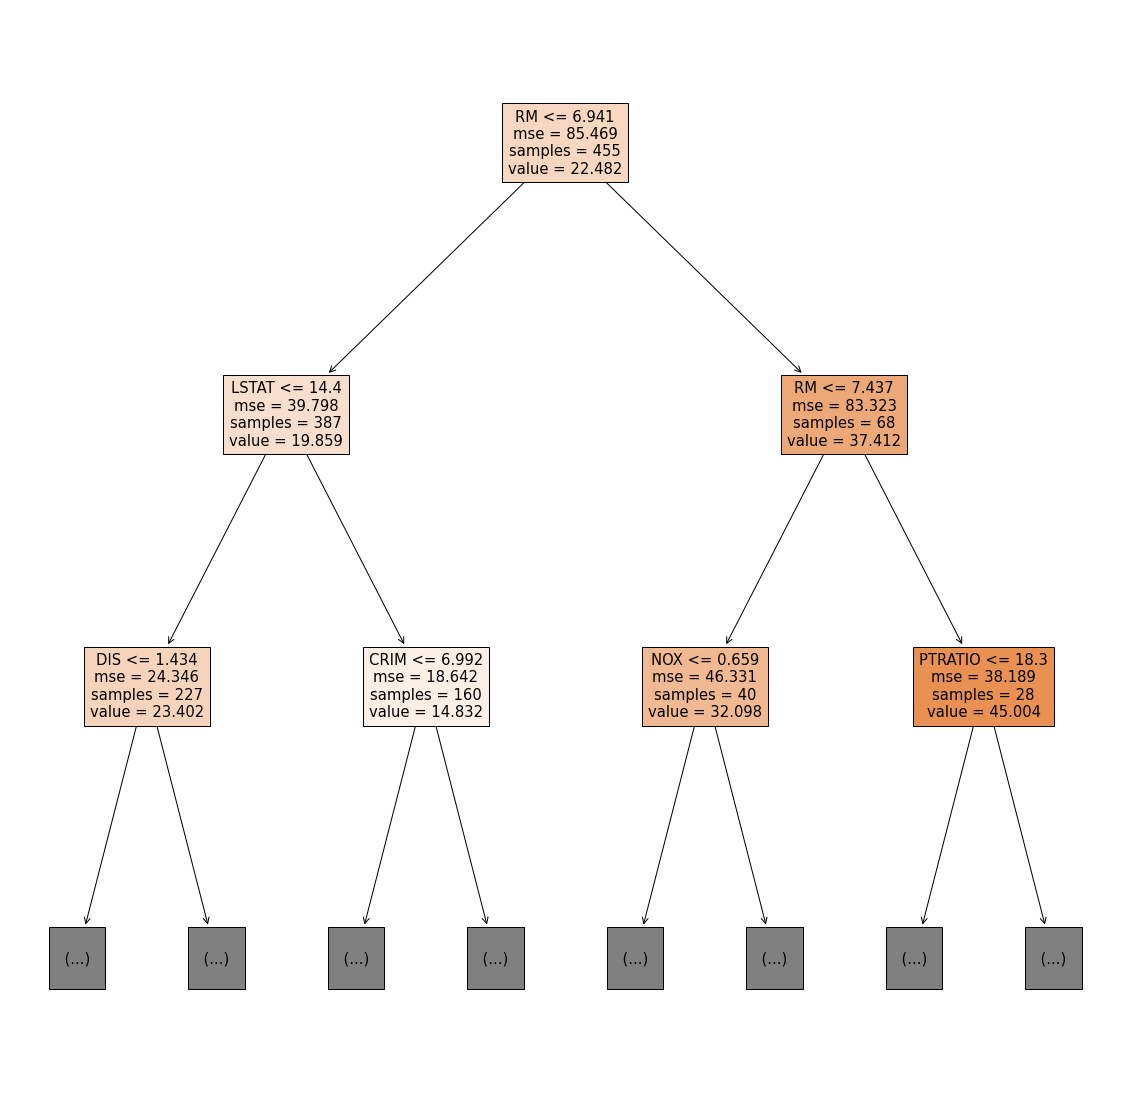

In [82]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize = (20, 20))
plot_tree(reg,
          feature_names=boston["feature_names"], 
          filled=True,
          max_depth = 2)

In [83]:
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
r2_score(y_test, pre)

0.6689643986539238